In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%precision 3

'%.3f'

### 문제1. 초등학생 신체데이터

2018년 초등학생 키와 몸무게 자료이다. 초등학교 6학년 남학생의 평균키는 152.5라고 한다. 2018년에 표본조사된 6학년 남학생의 키는 152.5보다 큰가? 유의수준 5%에서 가설검정을 수행하시오.

In [3]:
df = pd.read_excel('data/학생건강검사_초등학생2018.xlsx')
df

,개인ID,도시규모,도시규모별 분석용,광역시도,학교급별,학년,성별,생년월일,건강검진일,키,몸무게
0,212111q,특별/광역시,1,서울,초,1,남,20110302,20180511,124.1,25.3
1,212112w,특별/광역시,1,서울,초,1,남,20110111,20180511,131.1,30.8
2,212113e,특별/광역시,1,서울,초,1,남,20110719,20180511,121.1,27.4
3,212114r,특별/광역시,1,서울,초,1,남,20110330,20180511,122.1,23.1
4,212115t,특별/광역시,1,서울,초,1,남,20111008,20180511,120.0,20.9
...,...,...,...,...,...,...,...,...,...,...,...
17408,8987615g,면지역,2,제주,초,6,남,20060628,20180420,152.0,44.0
17409,8987616h,면지역,2,제주,초,6,남,20060216,20180420,156.0,42.8
17410,8987617j,면지역,2,제주,초,6,남,20060713,20180420,150.0,32.6
17411,8987618k,면지역,2,제주,초,6,남,20060311,20180420,151.0,56.5


In [4]:
# 데이터 전처리 : 확인
boy6 = pd.DataFrame({'height': df[(df['성별']=='남') & (df['학년']==6)]['키']})
boy6

,height
45,154.3
46,140.2
47,156.3
48,150.0
49,144.1
...,...
17408,152.0
17409,156.0
17410,150.0
17411,151.0


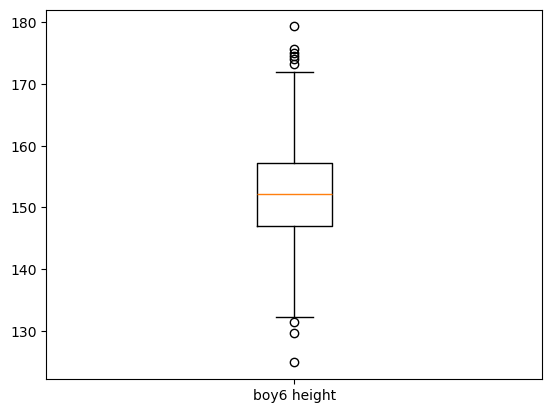

In [68]:
# 시각화
plt.boxplot(boy6)
plt.xticks([1], ['boy6 height'])
plt.show()

In [79]:
# 정규성 검정
stats.shapiro(boy6.height)

ShapiroResult(statistic=0.9973427057266235, pvalue=0.004541476257145405)

In [83]:
# 이상치 제거
boys6 = boy6.height[boy6.height > boy6.height.min()]
boys6 = boy6.height[boy6.height < boy6.height.max()]
stats.shapiro(boys6)

#pval이 0.05보다 크면 정규분포를 따르는 것 (따르지 X)

ShapiroResult(statistic=0.997248113155365, pvalue=0.003507910529151559)

In [84]:
#귀무: 2018년 6학년 남학생 키는 152.5보다 크지 않다
#대립: 2018년 6학년 남학생 키는 152.5보다 크다

# ttest 수행
s_mean = 152.5

t_sat, p_val = stats.ttest_1samp(boy6.height, s_mean)
print(f't검정통계량: {t_sat}, p_value: {p_val}')

alpha = 0.05
print('Reject H0' if p_val < alpha else 'Accept H0')

t검정통계량: -0.8239901093043531, p_value: 0.4100570142652121
Accept H0


결론
- 귀무가설 채택 / 통계적으로 유의미 X / 152.5보다 크지 않다.

### 문제2.

초등학교 1학년 남자와 여자의 혈압에 차이가 있는지 유의수준 5%에서 가설검정을 수행하시오.(모분산을 모름)

In [ ]:
male = [114, 96, 80, 102, 94, 94, 98, 92, 94, 100, 108, 110, 90, 90, 82, 106]
female = [108, 98, 88, 86, 100, 98, 104, 102, 94]

In [98]:
# 1. EDA
len(male) - len(female)
df = pd.DataFrame({'male': male, 'female': female + [np.nan] * (len(male) - len(female))})
df

,male,female
0,114,108.0
1,96,98.0
2,80,88.0
3,102,86.0
4,94,100.0
5,94,98.0
6,98,104.0
7,92,102.0
8,94,94.0
9,100,NaN


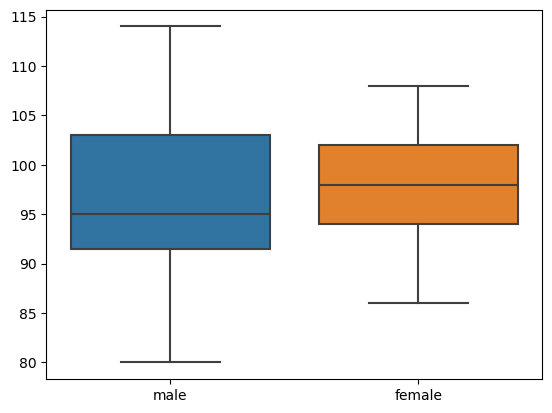

In [99]:
sns.boxplot(df)
plt.show()

In [54]:
# 2. 정규성 검정
print(stats.shapiro(male))
print(stats.shapiro(female))

ShapiroResult(statistic=0.9729186296463013, pvalue=0.8833795189857483)
ShapiroResult(statistic=0.9574438333511353, pvalue=0.7712234258651733)


=> 두 그룹의 데이터는 모두 정규성을 만족함

In [100]:
# 3. 등분산성 검정
stats.levene(male, female)

LeveneResult(statistic=0.782472546935884, pvalue=0.38554013266768483)

=> 등분산임

In [56]:
np.mean(male), np.std(male, ddof=1)

(96.875, 9.521)

In [57]:
np.mean(female), np.std(female, ddof=1)

(97.556, 7.196)

In [101]:
# 4. 독립표본 ttest 수행
stats.ttest_ind(male, female, equal_var=True, alternative='two-sided')

TtestResult(statistic=-0.18597961132240054, pvalue=0.8540912649163084, df=23.0)

결론:

- 두 그룹의 순위는 같다.
- pvalue가 0.05보다 크므로 귀무가설을 채택

In [85]:
# # 표본평균 및 표본표준편차 계산
# mean = np.mean(boy6)
# std = np.std(boy6, ddof=1)

# # 정규분포 곡선 그리기 위한 x 값 생성
# x = np.linspace(mean - 4*std, mean + 4*std, 1000)
# y = stats.norm.pdf(x, mean, std)

# # 히스토그램과 정규분포 곡선 그리기
# plt.hist(boy6, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
# plt.plot(x, y, 'r-', linewidth=2)
# plt.xlabel("height")
# plt.ylabel("density")
# plt.show()